In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using KernelDensity
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using DSP

In [2]:
FPATH = "../../data/sampling_results/Benchmark-5/"

function hist_2d(name, dim_1, dim_2; nbins=40, axmin = true, axmax=true)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp, smpl_w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    if axmin == true
        hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), nbins=nbins)
    else
       hist_tmp = fit(Histogram, (smpl_tmp[dim_1,:],smpl_tmp[dim_2,:]), FrequencyWeights(smpl_w), (range(axmin[1], stop=axmax[1], length=nbins), range(axmin[2], stop=axmax[2], length=nbins))) 
    end
    hist_tmp = normalize(hist_tmp, mode=:pdf) 
    return hist_tmp
end

function hist_1d(name, dim_1; nbins=40)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp, smpl_w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    hist_tmp = fit(Histogram, smpl_tmp[dim_1,:], FrequencyWeights(smpl_w), nbins=nbins)
    hist_tmp = normalize(hist_tmp, mode=:pdf)
    return hist_tmp
end

function marg_mean(name, dim_1, dim_2)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = unshaped(mode(smpl_tmp))
    return smpl_tmp[dim_1], smpl_tmp[dim_2]
end

function marg_std(name, dim_1, dim_2)
    smpl_tmp = bat_read(FPATH*name)
    smpl_tmp = varshape(prior).(smpl_tmp)
    smpl_tmp = unshaped(std(smpl_tmp))
    return smpl_tmp[dim_1], smpl_tmp[dim_2]
end

marg_std (generic function with 1 method)

In [3]:
β1 = 0.015
β2 = 0.0077
β3 = 0.0058 

prior = NamedTupleDist(
        tr_size = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        tr_size_2 = [truncated(Normal(0.2, 0.04), 0.06, 0.19), truncated(Normal(0.2, 0.04), 0.06, 0.19)],
        ang_spr = [truncated(Normal(4.0, 2.0), 4.0, 7.0), truncated(Normal(4.0, 2.0), 4.0, 7.0)],
        ang_spr_2 = [truncated(Normal(4.0, 2.0), 1.0, 4.0), truncated(Normal(4.0, 2.0), 1.0, 4.0)],
        mixt_pow =  0.50 .. 1.0 ,
        waist = [truncated(Normal(2.9, 0.03), 2.65, 3.5)],
        waist_2 = [truncated(Normal(2.9, 0.03), 2.65, 3.5)], # 11
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9, 
        resx = [1, 1, 1], # 23, 24, 25, 
        resy = [1, 1, 1], # 26,27, 28, 
        cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
        cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
        psx = [27.1, 21.6, 114.0], # 31, 32, 33
        psy = [30.5, 23.4, 125.0], # 34, 35, 36
        cam4_psx = 121.8, # 37
        cam4_psy = 120.0, # 38
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.1150],
    )

labels = [L"\sigma_x", L"\sigma_y", L"\sigma_x", L"\sigma_y", L"\sigma'_x", L"\sigma'_y", L"\sigma'_x", L"\sigma'_y", L"\alpha", L"s", L"s", 
    L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_x", L"\mu_y", L"\mu_y", L"\mu_y", L"\mu_y", 
    "ped", "lf", "a", 
    "res x", "res x", "res x", "res y", "res y", "res y", "res x", "res y", 
    "ps x", "ps x", "ps x", "ps y", "ps y", "ps y", "ps x", "ps y", 
    "la", "la", "la"
    ];

In [4]:
filenames = readdir("../../data/sampling_results/Benchmark-5/")
images = load("../../data/experiment/dataset_2/m2/images-satur.jld2");
hc_mask = [i[1:3] == "hc-" for i in filenames]
hc_fnames = filenames[hc_mask]
hc_eind = parse.(Int64, [i[4:end-5] for i in hc_fnames])
hc_charge = images["charge"][hc_eind]
hc_runind = images["ev_ind"][hc_eind];

In [5]:
filenames = readdir("../../data/sampling_results/Benchmark-5/")
images = load("../../data/experiment/dataset_2/m1/images-satur.jld2");
lc_mask = [i[1:3] == "lc-" for i in filenames]
lc_fnames = filenames[lc_mask]
lc_eind = parse.(Int64, [i[4:end-5] for i in lc_fnames])
lc_charge = images["charge"][lc_eind]
lc_runind = images["ev_ind"][lc_eind];

In [6]:
fnames = [lc_fnames; hc_fnames]
charges = [lc_charge; hc_charge]
runind = [lc_runind ; hc_runind]
charges_n = charges ./ maximum(charges)
runind_n = runind ./ maximum(runind);

In [7]:
fnames

35-element Array{String,1}:
 "lc-1.hdf5"
 "lc-137.hdf5"
 "lc-151.hdf5"
 "lc-169.hdf5"
 "lc-2.hdf5"
 "lc-225.hdf5"
 "lc-262.hdf5"
 "lc-299.hdf5"
 "lc-3.hdf5"
 "lc-343.hdf5"
 "lc-355.hdf5"
 "lc-369.hdf5"
 "lc-4.hdf5"
 ⋮
 "hc-281.hdf5"
 "hc-3.hdf5"
 "hc-311.hdf5"
 "hc-322.hdf5"
 "hc-357.hdf5"
 "hc-4.hdf5"
 "hc-435.hdf5"
 "hc-440.hdf5"
 "hc-442.hdf5"
 "hc-5.hdf5"
 "hc-72.hdf5"
 "hc-95.hdf5"

In [8]:
msklc = 1:length(lc_fnames)
mskhc = length(lc_fnames)+1:length(lc_fnames)+length(hc_fnames);

In [9]:
charges_n[sortperm(charges_n)] .= 1:length(charges_n)
charges_n = charges_n ./ maximum(charges_n);

## Plot 1: 

In [10]:
hists = [hist_2d(i, 1,2) for i in fnames]
hists_2 = [hist_2d(i, 3,4) for i in fnames]
mean_vals = [marg_mean(i, 1,2) for i in fnames]
mean_vals_2 = [marg_mean(i, 3,4) for i in fnames]
std_vals = [marg_std(i, 1,2) for i in fnames]
std_vals_2 = [marg_std(i, 3,4) for i in fnames]
hist1d_1 = [hist_1d(i, 1) for i in fnames]
hist1d_2 = [hist_1d(i, 2) for i in fnames];

In [11]:
xmin, xmax = 0.03, 0.24
xrange=range(xmin, stop = xmax,length=100)
yrange=range(xmin, stop = xmax,length=100)
xvals = [pdf(truncated(Normal(0.2, 0.04), 0.03, 0.25), x) for x in xrange]
yvals = [pdf(truncated(Normal(0.2, 0.04), 0.03, 0.25), y)  for y in yrange]
z = xvals*yvals';

In [12]:
hists = [hist_2d(i, 1,2, axmin=[0.03,0.03], axmax=[0.18,0.18], nbins=100,) for i in fnames];
hists_2 = [hist_2d(i, 3,4, axmin=[0.03,0.03], axmax=[0.18,0.18], nbins=100,) for i in fnames];

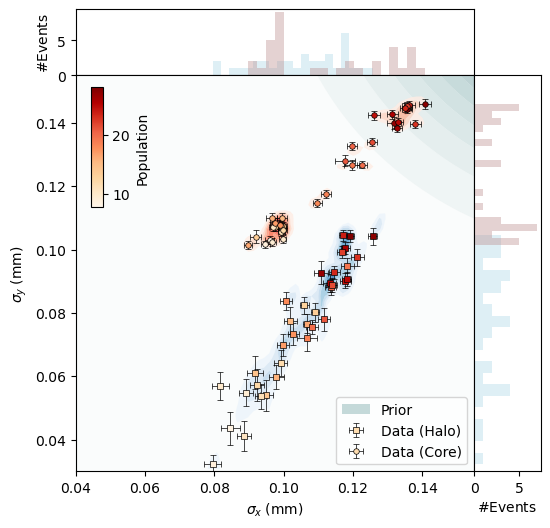

PyObject Text(51.425, 0.5, '$\\mathrm{\\# Events}$')

In [13]:
fig, ax= plt.subplots(2,2, figsize=(6,6), gridspec_kw=Dict("width_ratios"=>[6,1], "height_ratios"=>[1,6]))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[2,1].contourf(xrange, yrange, z, levels=range(0.1*minimum(z), maximum(z), length=25)[1:end], cmap="bone_r", alpha=0.7, antialiased=true) 

sum_weights = zeros(size(hists[1].weights'))
sum_weights_2 = zeros(size(hists_2[1].weights'))
for i in eachindex(hists)
    sum_weights = sum_weights .+ hists[i].weights'
    sum_weights_2 = sum_weights_2 .+ hists_2[i].weights'
end

label_1 = "Data (Halo)"
label_2 = "Data (Core)"
for i in eachindex(hists)    
    ax[2,1].errorbar(mean_vals[i][1], mean_vals[i][2], xerr=std_vals[i][1], yerr=std_vals[i][2], 
        color="k", 
        fmt="s", markersize=4, 
        mfc=plt.cm.OrRd(charges_n[i]), #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_1)
    label_1 = ""
    ax[2,1].errorbar(mean_vals_2[i][1], mean_vals_2[i][2], xerr=std_vals_2[i][1], yerr=std_vals_2[i][2], 
        color="k", 
        fmt="o", markersize=4,
        mfc=plt.cm.OrRd(charges_n[i]), #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_2)
    label_2 = ""
end

cb = ax[2,1].scatter(charges_n, charges_n, s=0.0, c=charges, cmap="OrRd")
ax_ins_3 = fig.add_axes([0.15,0.55,0.02,0.2])
fig.colorbar(cb, spacing="proportional", label="Population", cax=ax_ins_3)

proxy = plt.Rectangle((10, 10), 1, 1, fc=plt.cm.bone_r(0.17), label="Prior")
# proxy2 = plt.Rectangle((10, 10), 1, 1, fc=plt.cm.Blues(0.57), label="Posterior")
ax[2,1].add_patch(proxy)
# ax[2,1].add_patch(proxy2)
ax[2,1].legend(loc="lower right")

ax[1,1].hist([i[1] for i in mean_vals], bins=20, color="lightblue", alpha=0.4)
ax[2,2].hist([i[2] for i in mean_vals], bins=20, orientation="horizontal", color="lightblue", alpha=0.4)
ax[1,1].hist([i[1] for i in mean_vals_2], bins=20, color="rosybrown", alpha=0.4)
ax[2,2].hist([i[2] for i in mean_vals_2], bins=20, orientation="horizontal", color="rosybrown", alpha=0.4)

cnt = ax[2,1].contourf(midpoints(hists[1].edges[1]), midpoints(hists[1].edges[2]), broadcast(x-> x>1 ? x : NaN, sum_weights), 
    levels=range(minimum(sum_weights), maximum(sum_weights), length=11)[2:end], #corner_mask= true,
    cmap="Blues", alpha=0.8, antialiased=true) 

cnt = ax[2,1].contourf(midpoints(hists_2[1].edges[1]), midpoints(hists_2[1].edges[2]), broadcast(x-> x>1 ? x : NaN, sum_weights_2), 
    levels=range(minimum(sum_weights_2), maximum(sum_weights_2), length=11)[2:end], #corner_mask= true,
    cmap="Reds", alpha=0.8, antialiased=true) 

ax[1,1].set_ylim(bottom=0.0)
ax[2,2].set_xlim(left=0.0)

ax[1,2].set_visible(false)

ax[1,1].set_xticks([])
# ax[1,1].set_yticks([])
# ax[2,2].set_xticks([])
ax[2,2].set_yticks([])

ax[2,1].set_xlim(0.04, 0.155)
ax[1,1].set_xlim(0.04, 0.155)
ax[2,1].set_ylim(0.03, 0.155)
ax[2,2].set_ylim(0.03, 0.155)

ax[2,1].set_xlabel(L"\sigma_x \; (\mathrm{mm})")
ax[2,2].set_xlabel(L"\mathrm{\# Events}")
ax[2,1].set_ylabel(L"\sigma_y \; (\mathrm{mm})")
ax[1,1].set_ylabel(L"\mathrm{\# Events}")

## Plot 2: 

In [14]:
hists = [hist_2d(i, 5,6) for i in fnames]
mean_vals = [marg_mean(i, 5,6) for i in fnames]
mean_vals_2 = [marg_mean(i, 7,8) for i in fnames]
std_vals = [marg_std(i, 5,6) for i in fnames]
std_vals_2 = [marg_std(i, 7,8) for i in fnames];

In [15]:
xmin, xmax = 1, 7
xrange=range(xmin, stop = xmax,length=300)
yrange=range(xmin, stop = xmax,length=300)
xvals = [pdf(truncated(Normal(4, 2), 1, 7), x) for x in xrange]
yvals = [pdf(truncated(Normal(4, 2), 1, 7), y)  for y in yrange]
z = xvals*yvals';

In [16]:
hists = [hist_2d(i, 5,6, axmin=[4,4], axmax=[8,8]) for i in fnames];
hists_2 = [hist_2d(i, 7,8, axmin=[1.0,1.0], axmax=[3.5,3.5]) for i in fnames];

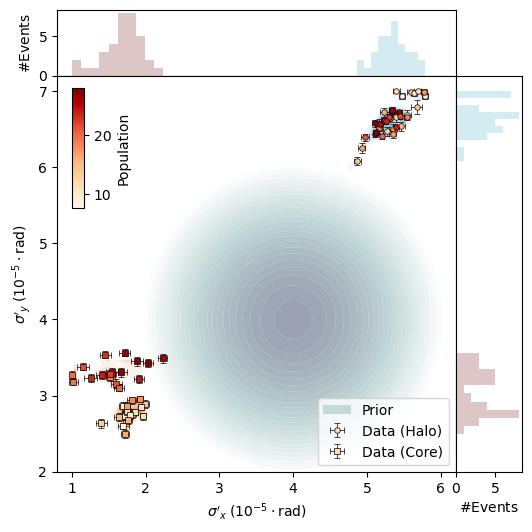

PyObject Text(32.90000000000001, 0.5, '$\\mathrm{\\# Events}$')

In [17]:
fig, ax= plt.subplots(2,2, figsize=(6,6), gridspec_kw=Dict("width_ratios"=>[6,1], "height_ratios"=>[1,6]))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[2,1].contourf(xrange, yrange, z, levels=range(0.6*maximum(z), 1.4*maximum(z), length=50)[1:end], cmap="bone_r", alpha=0.7, antialiased=true) 

sum_weights = zeros(size(hists[1].weights'))
sum_weights_2 = zeros(size(hists_2[1].weights'))

for i in eachindex(hists)
    sum_weights = sum_weights .+ hists[i].weights'
    sum_weights_2 = sum_weights_2 .+ hists_2[i].weights'
end

label_1 = "Data (Halo)"
label_2 = "Data (Core)"
for i in eachindex(hists)    
    ax[2,1].errorbar(mean_vals[i][1], mean_vals[i][2], xerr=std_vals[i][1], yerr=std_vals[i][2], 
        color="k", 
        fmt="o", markersize=4, 
        mfc=plt.cm.OrRd(charges_n[i]), #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_1)
    label_1 = ""
    ax[2,1].errorbar(mean_vals_2[i][1], mean_vals_2[i][2], xerr=std_vals_2[i][1], yerr=std_vals_2[i][2], 
        color="k", 
        fmt="s", markersize=4, 
        mfc=plt.cm.OrRd(charges_n[i]), #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_2)
    label_2 = ""
end

cb = ax[2,1].scatter(charges_n, charges_n, s=0.0, c=charges, cmap="OrRd")
ax_ins_3 = fig.add_axes([0.15,0.55,0.02,0.2])
fig.colorbar(cb, spacing="proportional", label="Population", cax=ax_ins_3)

proxy = plt.Rectangle((10, 10), 1, 1, fc=plt.cm.bone_r(0.17), label="Prior")
# proxy2 = plt.Rectangle((10, 10), 1, 1, fc=plt.cm.Blues(0.57), label="Posterior LC")
# proxy3 = plt.Rectangle((10, 10), 1, 1, fc=plt.cm.Greens(0.57), label="Posterior SC")
ax[2,1].add_patch(proxy)
# ax[2,1].add_patch(proxy2)
# ax[2,1].add_patch(proxy3)
ax[2,1].legend(loc="lower right")

ax[1,1].hist([i[1] for i in mean_vals], bins=10, alpha=0.5, color="lightblue")
ax[1,1].hist([i[1] for i in mean_vals_2], bins=10, alpha=0.5, color="rosybrown")
ax[2,2].hist([i[2] for i in mean_vals], bins=10, alpha=0.5, orientation="horizontal", color="lightblue")
ax[2,2].hist([i[2] for i in mean_vals_2], bins=10, alpha=0.5, orientation="horizontal", color="rosybrown")

cnt = ax[2,1].contourf(midpoints(hists[1].edges[1]), midpoints(hists[1].edges[2]), broadcast(x-> x>1 ? x : NaN, sum_weights), 
    levels=range(minimum(sum_weights), maximum(sum_weights), length=9)[2:end], #corner_mask= true,
    cmap="Blues", alpha=0.6, antialiased=true) 

cnt = ax[2,1].contourf(midpoints(hists_2[1].edges[1]), midpoints(hists_2[1].edges[2]), broadcast(x-> x>1 ? x : NaN, sum_weights_2), 
    levels=range(minimum(sum_weights_2), maximum(sum_weights_2), length=9)[2:end], #corner_mask= true,
    cmap="Reds", alpha=0.6, antialiased=true) 

ax[1,1].set_ylim(bottom=0.0)
ax[2,2].set_xlim(left=0.0)

ax[1,2].set_visible(false)

ax[1,1].set_xticks([])
ax[2,2].set_yticks([])

ax[2,1].set_xlim(0.8, 6.2 )
ax[1,1].set_xlim(0.8, 6.2)
ax[2,1].set_ylim(2, 7.2)
ax[2,2].set_ylim(2, 7.2)

ax[2,1].set_xlabel(L"\sigma'_x \; (\mathrm{10^{-5} \cdot rad})")
ax[2,2].set_xlabel(L"\mathrm{\# Events}")
ax[2,1].set_ylabel(L"\sigma'_y \; (\mathrm{10^{-5} \cdot rad})")
ax[1,1].set_ylabel(L"\mathrm{\# Events}")

## Plot #3

In [18]:
hist1d_1 = [hist_1d(i, 11, nbins=50) for i in fnames]
mean_vals = [marg_mean(i, 11,11) for i in fnames];

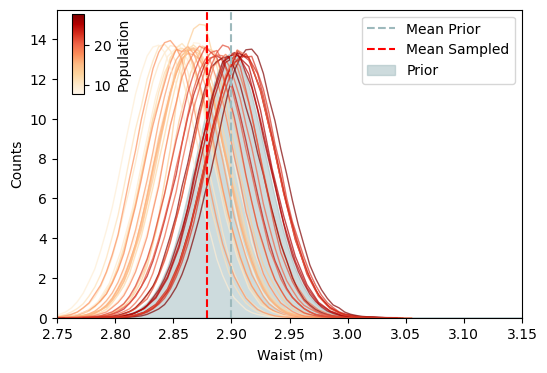

PyObject <matplotlib.legend.Legend object at 0x7f6b39879cd0>

In [19]:
fig, ax= plt.subplots(1,1, figsize=(6,4), )

x_range = range(2.7, stop=3.3, length=100)
ax.fill_between(x_range, pdf.(Normal(2.9, 0.03), x_range), color=plt.cm.bone_r(0.3), label="Prior", alpha=0.5)

for i in eachindex(hists)  
    ax.plot(midpoints(hist1d_1[i].edges[1]), hist1d_1[i].weights, color=plt.cm.OrRd(charges_n[i]), alpha=0.7, lw=1)
end

cb = ax.scatter(charges_n, charges_n, s=0.0, c=charges, cmap="OrRd")
ax_ins_3 = fig.add_axes([0.15,0.67,0.02,0.2])
fig.colorbar(cb, spacing="proportional", label="Population", cax=ax_ins_3)

ax.axvline([2.9], color=plt.cm.bone_r(0.3), ls="--", label="Mean Prior")
ax.axvline(mean([i[2] for i in mean_vals]), color="red", ls="--", label="Mean Sampled")

ax.set_ylim(bottom=0.0,)
ax.set_xlim(2.75, 3.15)

ax.set_xlabel(L"\mathrm{Waist \; (m)}")
ax.set_ylabel("Counts")
ax.legend()

In [20]:
xmin, xmax = 2.7, 3.3
xrange=range(xmin, stop = xmax,length=100)
yrange=range(1, stop = 30, length=100)
xvals = [pdf(Normal(2.9, 0.03), x) for x in xrange]
yvals = [1  for y in yrange]
z = xvals*yvals';

In [21]:
mean_vals = [marg_mean(i, 10,11) for i in fnames];
std_vals = [marg_std(i, 10,11) for i in fnames];

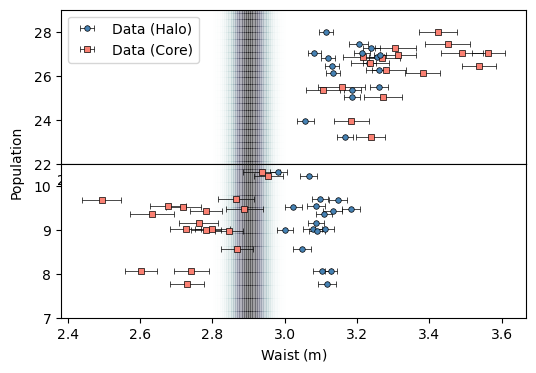

PyObject Text(0.04, 0.5, 'Population')

In [22]:
fig, ax = plt.subplots(2,1, figsize=(6,4), )
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[1].pcolormesh(xrange, yrange, z', cmap="bone_r", alpha=0.4, rasterized=true) 
ax[2].pcolormesh(xrange, yrange, z', cmap="bone_r", alpha=0.4, rasterized=true) 

label_1 = "Data (Halo)"
label_2 = "Data (Core)"

label_1 = "Data (Halo)"
label_2 = "Data (Core)"
for i in eachindex(mean_vals)    
    
    ax[1].errorbar(mean_vals[i][1], charges[i], xerr=std_vals[i][1],  
        color="k", 
        fmt="o", markersize=4, 
        mfc="steelblue", #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_1)
    label_1 = ""
    
    ax[1].errorbar(mean_vals_2[i][2], charges[i], xerr=std_vals_2[i][2], 
        color="k", 
        fmt="s", markersize=4, 
        mfc="salmon", #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_2)
    label_2 = ""
    
    ax[2].errorbar(mean_vals[i][1], charges[i], xerr=std_vals[i][1],  
        color="k", 
        fmt="o", markersize=4, 
        mfc="steelblue", #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_1)
    
    ax[2].errorbar(mean_vals_2[i][2], charges[i], xerr=std_vals_2[i][2], 
        color="k", 
        fmt="s", markersize=4, 
        mfc="salmon", #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label_2)
end

ax[1].set_ylim(22,29)
ax[2].set_ylim(7,10.5)

ax[1].legend()

ax[2].set_xlabel(L"\mathrm{Waist \; (m)}")
fig.text(0.04, 0.5, "Population", va="center", rotation="vertical")

In [23]:
hists = [hist_2d(i, 23,24, axmin=[2,2], axmax=[7,7]) for i in fnames];
mean_vals = [marg_mean(i, 23,24) for i in fnames];
std_vals = [marg_std(i, 23,24) for i in fnames];

In [24]:
xmin, xmax = 1, 7
xrange=range(xmin, stop = xmax,length=300)
yrange=range(xmin, stop = xmax,length=300)
xvals = [pdf(truncated(Normal(3, 1.5), 0, Inf), x) for x in xrange]
yvals = [pdf(truncated(Normal(3, 1.5), 0, Inf), y)  for y in yrange]
z = xvals*yvals';

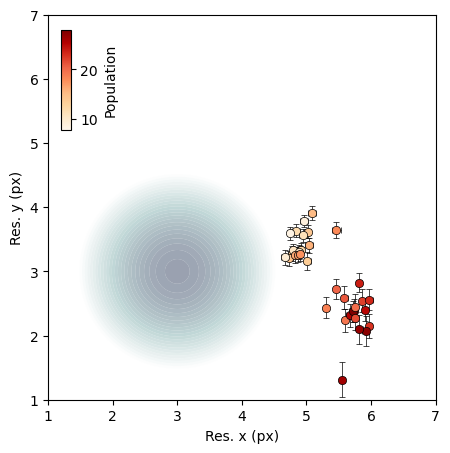

(1.0, 7.0)

In [25]:
fig, ax= plt.subplots(1,1, figsize=(5,5),)

ax.contourf(xrange, yrange, z, levels=range(0.6*maximum(z), 1.4*maximum(z), length=50)[1:end], cmap="bone_r", alpha=0.7, antialiased=true) 

label = "Data Event"
for i in eachindex(hists)    
    ax.errorbar(mean_vals[i][1], mean_vals[i][2], xerr=std_vals[i][1], yerr=std_vals[i][2], 
        color="k", 
        fmt="o", 
        mfc=plt.cm.OrRd(charges_n[i]), #red
        markeredgecolor = "k", markeredgewidth=0.5,
        capsize=2, ecolor="k", elinewidth=0.5, label=label)
    label = ""
end

cb = ax.scatter(charges_n, charges_n, s=0.0, c=charges, cmap="OrRd")
ax_ins_3 = fig.add_axes([0.15,0.65,0.02,0.2])
fig.colorbar(cb, spacing="proportional", label="Population", cax=ax_ins_3)

ax.set_xlabel("Res. x (px)")
ax.set_ylabel("Res. y (px)")

ax.set_xlim(1,7)
ax.set_ylim(1,7)